# Domain Tutorial

The domain of the model (PDE initial/boundary value problem) is represented as an object. A domain is more abstract than a mesh, which is an object we'll discuss in a later tutorial. The domain is ideally the exact geometry of the physical domain, possibly parameterized so it can be scaled, rotated, etc. There are many useful types of domain defined in `proteus.Domain`, but here will comple a few simple types and a few general types.

In [1]:
from proteus import Domain

## Rectangular Domains
Let $\Omega = (0,1) \times (0,1)$.  $\Omega$ can be defined as a `RectangularDomain`:

In [2]:
box = Domain.RectangularDomain(L=(1.0,1.0),
                               x=(0.0,0.0),
                               name="UnitSquare",
                               units='m')
print("Dimensions L=({0:f},{1:f})".format(box.L[0],box.L[1]))
print("Lower Left Corner x=({0:f},{1:f})".format(box.x[0],box.x[1]))

Dimensions L=(1.000000,1.000000)
Lower Left Corner x=(0.000000,0.000000)


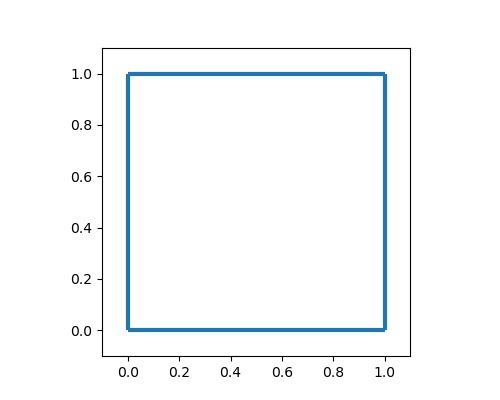

In [3]:
%matplotlib ipympl
import domain_plots as dplt
dplt.plot_rectangular_domain(box)

## Planar Straight Line Graphs

Real world problems typically require something more complex. The `PlanarStraightLineGraphDomain` type can be used to describe many two-dimensional domains. A [Planar Straight Linear Graph](https://en.wikipedia.org/wiki/Planar_straight-line_graph) (PSLG) is a precisely defined graph consisting of vertices, segments that can only intersect at vertices, regions (areas enclosed by segments), and holes (areas enclosed by segments but removed from the domain).

We can flag boundary segments with an integer that partitions (colors or classifies) the boundary. This is useful for setting boundary condtions. In fact, each class of mesh entity (vertices, segments, and regions) can be classified. The vertex and segment flags are used for boundary conditions while the regions are used for material properties.

Regions and holes are specified simply by provideing the coordinates of a point that lies inside the region.

*Note:* If you provide classification, the lists of entities must be the same length. 

*Note:* A triangular mesh is also a PSLG, and so is a quadrilateral mesh. In fact, a PSLG is a general type of linear geometry that can be used as input to a triangular mesh generator, such as [triangle](https://www.cs.cmu.edu/~quake/triangle.html)

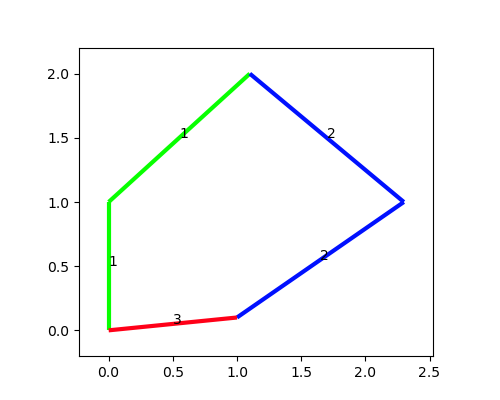

In [4]:
polygon = Domain.PlanarStraightLineGraphDomain(
vertices=[[0.0,0.0],[0.0,1.0],[1.1,2.0],[2.3,1.0],[1.0,0.1]],
vertexFlags=[1     , 1       , 1       , 2       , 2],
segments    =[[0,1],[1,2],[2,3],[3,4],[4,0]],
segmentFlags=[ 1   , 1   ,2    ,2    ,3],
regions=[[1.0,1.0]],
regionFlags=[1],
name="SomePolygon",
units='m')
dplt.plot_pslg_domain(polygon)

### Exercise 1

Create and plot a PSLG for a rectangular tank.

### Exercise 2

Create a PSLG Domain that approximates a parabolic basin and provide different flags for the top and bottom of the basin. Provide the maximum segment size on the parabolic boundary.

## Holes and regions 

Remember that holes and regions have to be enclosed by connected segments. Imagine that meshing algorithm for taging cells as holes or regions as the diffusion of a gas. If the point you use to describe your region or hole is not enclosed, then the region/hole will diffusion into any region it can reach without crossing a segment.

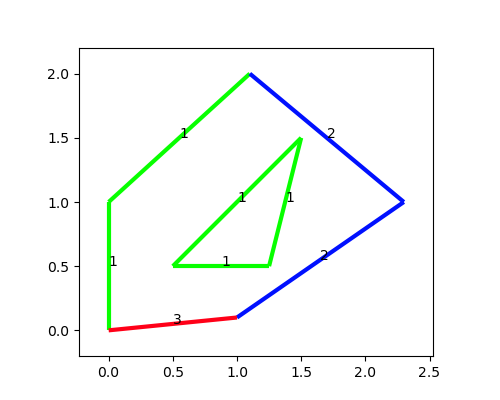

In [5]:
vertices=[[0.0,0.0],[0.0,1.0],[1.1,2.0],[2.3,1.0],[1.0,0.1],[0.5,0.5],[1.5,1.5],[1.25,.5]]
vertexFlags=[1     , 1       , 1       , 2       , 2       , 1       , 1       , 1]
assert len(vertices) == len(vertexFlags)
segments    =[[0,1],[1,2],[2,3],[3,4],[4,0]      ,[5,6], [6,7], [7,5]]
segmentFlags=[ 1   , 1   ,2    ,2    ,3          , 1   , 1    , 1 ]
assert len(segments) == len(segmentFlags)
regions=[[1.0e2,1.0e2]]
regionFlags=[1]
assert len(regions) == len(regionFlags)
holes=[[1.0,1.0]]
polygon_holes = Domain.PlanarStraightLineGraphDomain(
    vertices=vertices,
    vertexFlags=vertexFlags,
    segments=segments,
    segmentFlags=segmentFlags,
    regions=regions,
    holes=holes,
    name="PolygonWithHoles",
    units='m')
dplt.plot_pslg_domain(polygon_holes)

### Exercise 3

Create a PSLG with two regions and one rectangular obstacle (hole).

## Getting a PSLG from Rectangular domain

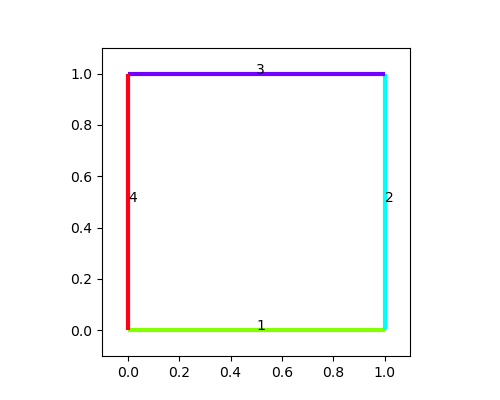

In [6]:
box.writePoly("myBox")
box_pslg = Domain.PlanarStraightLineGraphDomain()
box_pslg.readPoly("myBox")
dplt.plot_pslg_domain(box_pslg)
#help(box_pslg)

A `PiecewiseLinearComplex` is a general three-dimensional domain type. Here we create one by extruding the previous 2D domain.

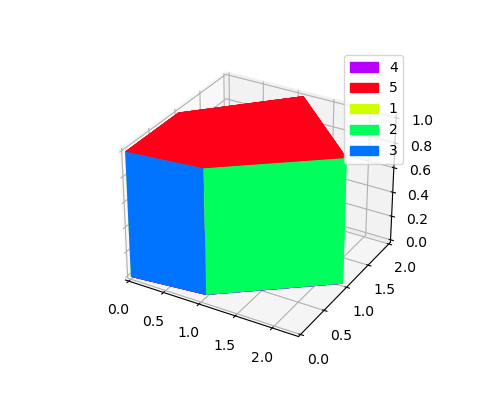

In [7]:
vertices3D = []
facets3D = []
facetFlags3D=[]
#extrude the 
nVertices2D=len(polygon.vertices)
maxFlag = max(polygon.segmentFlags)
for v in polygon.vertices: 
    vertices3D.append([v[0],v[1],0.0])
    facets3D.append([range(nVertices2D)])
    facetFlags3D.append(maxFlag+1)
for v in polygon.vertices:
    vertices3D.append([v[0],v[1],1.0])
    facets3D.append([range(nVertices2D,nVertices2D*2)])
    facetFlags3D.append(maxFlag+2)
nSegments2D  = len(polygon.segments)
for s,sN in zip(polygon.segments,polygon.segmentFlags):
    facets3D.append([[s[0],s[1],(s[1]+nSegments2D)%(2*nSegments2D),s[0]+nSegments2D]])
    facetFlags3D.append(sN)
polyhedron = Domain.PiecewiseLinearComplexDomain(
vertices=vertices3D,
facets=facets3D,
facetFlags=facetFlags3D)
plt = dplt.plot_plc_domain(polyhedron)

### Exercise 4

Add a cubical hole to the domain above.